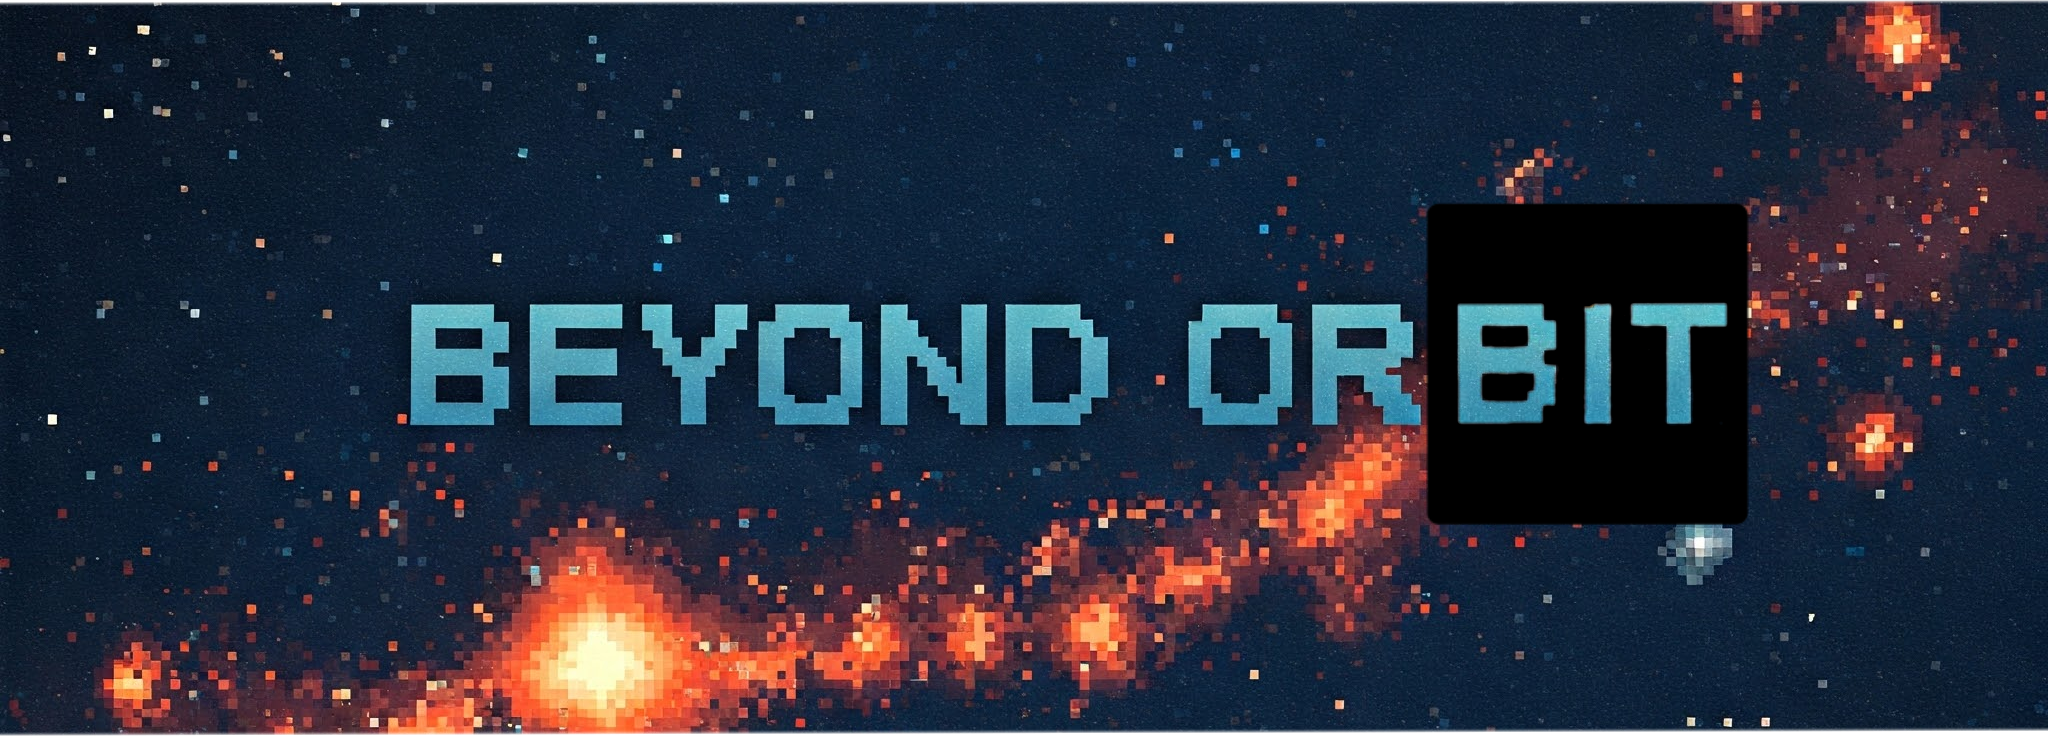

## <font color='#4C5FEA'> **CONTENIDO**</font>

[**1. Integrantes y referencias**](#Integrantes)

[**2. Intento 1: Casillas con Numpy**](#Intento1)

[**3. Intento 2: Botones widgets interactivos**](#Intento2)

[**4. Intento 3: Sin pantalla interactiva**](#Intento3)

[**5. Intento 4: V1**](#Intento4)

[**6. Intento 5: V2**](#Intento5)

[*6.1. Modelo de sol estatico*](#Intento5-1)

[*6.2. Modelo de sol animado*](#Intento5-2)

[**7. Tareas Pendientes**](#Pendientes)

# <font color="00CED1"><center> **PROYECTO FINAL BEYOND OR-BIT** </center></font>


Referencias:

*Proyecto Life.ipnyb*
por Peter Norvig
2017 | 2020

### <font color="00CED1"> **INTEGRANTES:** </font><a name="Integrantes"></a>

- Samuel David Penilla
- David Ricardo Martinez
- Sebastián Villamizar Saavedra
- Kevin Farith Garcia Chaparro
- Nelson Javier Torres Alvarez
- 6

### <font color="00CED1"> **INTENTO 1** </font><a name="Intento1"></a>
CASILLAS CON NUMPY

pygame 2.6.1 (SDL 2.28.4, Python 3.11.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


Button(description='Detener y Guardar', style=ButtonStyle())

Output()


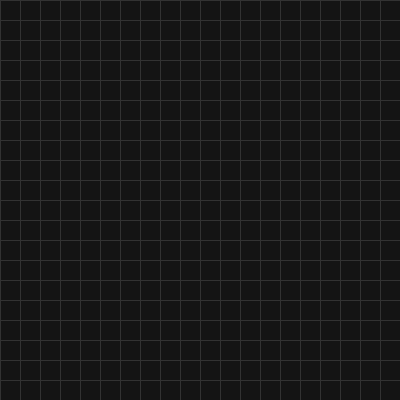

KeyboardInterrupt: 

In [ ]:
import pygame
import numpy as np
from google.colab import output
import time
from IPython.display import display, HTML
import io
import base64
import ipywidgets as widgets
from IPython.display import clear_output

GRID_SIZE = 20  # Tamaño de la cuadrícula (filas y columnas)
CELL_SIZE = 20  # Tamaño de cada celda (píxeles)
WIDTH = GRID_SIZE * CELL_SIZE
HEIGHT = GRID_SIZE * CELL_SIZE
BACKGROUND_COLOR = (20, 20, 20)  # Gris oscuro
CELL_COLOR = (220, 220, 220)    # Gris claro
GRID_LINE_COLOR = (50, 50, 50)   # Gris más oscuro
SELECTED_COLOR = (255, 0, 0)     # Rojo para píxeles seleccionados

# Inicializar Pygame (sin ventana visible directamente)
pygame.init()
screen = pygame.Surface((WIDTH, HEIGHT))  # Creamos una superficie en memoria

# Inicializar la cuadrícula
grid = np.zeros((GRID_SIZE, GRID_SIZE), dtype=int)
selected_pixels = set()  # Conjunto para almacenar las coordenadas de los píxeles seleccionados

# --- Funciones ---
def draw_grid():
    for x in range(0, WIDTH, CELL_SIZE):
        pygame.draw.line(screen, GRID_LINE_COLOR, (x, 0), (x, HEIGHT))
    for y in range(0, HEIGHT, CELL_SIZE):
        pygame.draw.line(screen, GRID_LINE_COLOR, (0, y), (WIDTH, y))

def draw_cells():
    for row in range(GRID_SIZE):
        for col in range(GRID_SIZE):
            if grid[row, col] == 1:
                pygame.draw.rect(screen, CELL_COLOR, (col * CELL_SIZE, row * CELL_SIZE, CELL_SIZE, CELL_SIZE))
            if (row, col) in selected_pixels:
                pygame.draw.rect(screen, SELECTED_COLOR, (col * CELL_SIZE, row * CELL_SIZE, CELL_SIZE, CELL_SIZE))

def handle_input():
    global grid, selected_pixels
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            return False
        if event.type == pygame.MOUSEBUTTONDOWN:
            mouse_x, mouse_y = pygame.mouse.get_pos()
            col = mouse_x // CELL_SIZE
            row = mouse_y // CELL_SIZE
            if 0 <= row < GRID_SIZE and 0 <= col < GRID_SIZE:
                grid[row, col] = 1 - grid[row, col]  # Alternar el estado de la celda (encendido/apagado)
                if grid[row, col] == 1:  # Si se enciende, lo seleccionamos
                    selected_pixels.add((row, col))
                else:  # Si se apaga, lo deseleccionamos
                    if (row, col) in selected_pixels:
                        selected_pixels.remove((row, col))
    return True

def display_frame(surface, display_id):
    buffer = io.BytesIO()
    pygame.image.save(surface, buffer, 'PNG')
    img_str = base64.b64encode(buffer.getvalue()).decode('utf-8')
    html = f'<img src="data:image/png;base64,{img_str}">'
    display(HTML(html), display_id=display_id, update=True)

# --- Botón de Detener ---
stop_button = widgets.Button(description="Detener y Guardar")
output_widget = widgets.Output()
display(stop_button, output_widget)

collecting_data = True
saved_pixels = []

def on_stop_button_clicked(b):
    global collecting_data, saved_pixels
    collecting_data = False
    saved_pixels = sorted(list(selected_pixels)) # Guardar los píxeles seleccionados
    with output_widget:
        clear_output()
        print("Programa detenido y datos guardados.")

stop_button.on_click(on_stop_button_clicked)

# --- Bucle Principal ---
running = True
output_area = display(None, display_id='pygame_output') # Creamos un área de salida con un ID
while running:
    screen.fill(BACKGROUND_COLOR)
    running = handle_input()
    draw_grid()
    draw_cells()
    display_frame(screen, output_area.display_id)
    time.sleep(0.1)
    if not collecting_data:
        running = False # Establecer running a False para salir del bucle

pygame.quit()

# --- Mostrar los píxeles guardados después de detener ---
if saved_pixels:
    print("\nCeldas seleccionadas guardadas:")
    for pixel in saved_pixels:
        print(f"Fila: {pixel[0]}, Columna: {pixel[1]}")
else:
    print("\nNo se seleccionaron celdas antes de detener.")

### <font color="00CED1"> **INTENTO 2** </font><a name="Intento2"></a>
BOTONES WIDGETS INTERACTIVOS EN EL DISPLAY

In [ ]:
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output
import time

GRID_SIZE = 20
CELL_COLOR_OFF = 'lightgray'  # Color inicial de los botones
CELL_COLOR_ON = 'red'        # Color para las celdas seleccionadas
BUTTON_BORDER_COLOR = 'black' # Color del borde de los botones
BUTTON_BORDER_WIDTH = '1px'   # Ancho del borde de los botones

# Inicializar la cuadrícula
grid = np.zeros((GRID_SIZE, GRID_SIZE), dtype=int)
buttons = np.empty((GRID_SIZE, GRID_SIZE), dtype=object)
selected_coordinates = []
running = True

# Crear la cuadrícula de botones con bordes y color inicial
grid_container = widgets.GridBox(children=[], layout=widgets.Layout(grid_template_columns=f"repeat({GRID_SIZE}, 20px)"))

def on_cell_clicked(b):
    global grid, selected_coordinates
    coord = b.coord
    row, col = coord
    grid[row, col] = 1 - grid[row, col]
    if grid[row, col] == 1:
        b.style.button_color = CELL_COLOR_ON
        if (row, col) not in selected_coordinates:
            selected_coordinates.append((row, col))
    else:
        b.style.button_color = CELL_COLOR_OFF
        if (row, col) in selected_coordinates:
            selected_coordinates.remove((row, col))

for i in range(GRID_SIZE):
    row_buttons = []
    for j in range(GRID_SIZE):
        button = widgets.Button(
            layout=widgets.Layout(width='20px', height='20px', margin='0px'),
            style=widgets.ButtonStyle(button_color=CELL_COLOR_OFF, border=f"{BUTTON_BORDER_WIDTH} solid {BUTTON_BORDER_COLOR}")
        )
        button.coord = (i, j)
        button.on_click(on_cell_clicked)
        row_buttons.append(button)
        buttons[i, j] = button
    grid_container.children = list(grid_container.children) + row_buttons

# Botón de detener y guardar
stop_button = widgets.Button(description="Detener y Guardar")
output_widget = widgets.Output()

def on_stop_button_clicked(b):
    global running, selected_coordinates
    running = False
    with output_widget:
        clear_output()
        print("Programa detenido y celdas seleccionadas guardadas.")
        if selected_coordinates:
            print("\nCeldas seleccionadas:")
            for pixel in selected_coordinates:
                print(f"Fila: {pixel[0]}, Columna: {pixel[1]}")
        else:
            print("\nNo se seleccionaron celdas.")

stop_button.on_click(on_stop_button_clicked)

# Mostrar la interfaz
display(grid_container)
display(stop_button, output_widget)

# Bucle principal (simulado)
while running:
    time.sleep(0.1)

print("\nPrograma finalizado.")

# Imprimir la lista de coordenadas guardadas después de detener
print("\nLista de coordenadas de celdas seleccionadas (para usar posteriormente):")
print(selected_coordinates)

GridBox(children=(Button(layout=Layout(height='20px', margin='0px', width='20px'), style=ButtonStyle(button_co…

Button(description='Detener y Guardar', style=ButtonStyle())

Output()

KeyboardInterrupt: 

### <font color="00CED1"> **INTENTO 3** </font><a name="Intento3"></a>
Sin pantalla interactiva

In [ ]:
from collections     import Counter
from typing          import Set, Tuple, Dict, Iterator, List
from itertools       import islice
from IPython.display import clear_output, display_html
from time            import sleep
import sys

Cell  = Tuple[int, int]
World = Set[Cell]

In [ ]:
def life(world, n=sys.maxsize) -> Iterator[World]:
    """Yield `n` generations, starting from the given world."""
    for g in range(n):
        yield world
        world = next_generation(world)

def next_generation(world) -> World:
    """The set of live cells in the next generation."""
    return {cell for cell, count in neighbor_counts(world).items()
            if count == 3 or (count == 2 and cell in world)}

def neighbor_counts(world) -> Dict[Cell, int]:
    """A Counter of the number of live neighbors for each cell."""
    return Counter(xy for cell in world
                      for xy in neighbors(cell))

def neighbors(cell) -> List[Cell]:
    """All 8 adjacent neighbors of cell."""
    (x, y) = cell
    return [(x + dx, y + dy)
            for dx in (-1, 0, 1)
            for dy in (-1, 0, 1)
            if not (dx == 0 == dy)]

In [ ]:
world = {(3, 1), (1, 2), (1, 3), (2, 3)}
next_generation(world)

{(1, 2), (1, 3), (2, 3)}

In [ ]:
LIVE  = '■'
EMPTY = '.'
PAD   = ' '

def picture(world, Xs: range, Ys: range) -> str:
    """Return a picture of the world: a grid of characters representing the cells in this window."""
    def row(y): return PAD.join(LIVE if (x, y) in world else EMPTY for x in Xs)
    return '\n'.join(row(y) for y in Ys)

In [ ]:
print(picture(world, range(5), range(5)))

. . . . .
. . . ■ .
. ■ . . .
. ■ ■ . .
. . . . .


*Aqui se encuentra la función que anima los mundos. Donde world es la captura de un instante en un mundo, n es las generaciones, Xs y Ys son el rango de cuadricula del mundo y pause es la fraccion en segundos que hay entre pantallas/generaciones.*

In [ ]:
def animate_life(world, n=20, Xs=range(10), Ys=range(10), pause=1/5):
    """Display the evolving world for `n` generations."""
    for g, world in enumerate(life(world, n)):
        clear_output(wait=True)
        time.sleep(0.1)
        display_html(pre(f'Generation: {g:2}, Population: {len(world):2}\n' +
                         picture(world, Xs, Ys)), raw=True)
def animate_life(world, n=20, Xs=range(15), Ys=range(15), pause=1/5):
    """Display the evolving world for `n` generations."""
    for g, world in enumerate(life(world, n)):
        clear_output(wait=True)
        time.sleep(0.1)
        display_html(pre(f'Generation: {g:2}, Population: {len(world):2}\n' +
                         picture(world, Xs, Ys)), raw=True)
        sleep(pause)

def pre(text) -> str: return f'<pre>{text}</pre>'

In [ ]:
animate_life(world, 4, range(5), range(5), 1)

Generation: 3, Population: 4
. . . . .
. . . . .
. ■ ■ . .
. ■ ■ . .
. . . . .

In [ ]:
def shape(picture, dx=0, dy=0) -> World:
    """Convert a graphical picture (e.g. '@ @ .\n. @ @') into a world (set of cells)."""
    cells = {(x, y)
             for (y, row) in enumerate(picture.splitlines())
             for (x, c) in enumerate(row.replace(PAD, ''))
             if c == LIVE}
    return slide(cells, dx, dy)

def slide(cells, dx, dy):
    """Translate/slide a set of cells by a (dx, dy) offset."""
    return {(x + dx, y + dy) for (x, y) in cells}

point       = shape(' ■ ', 0, 0)
blinker     = shape("■■■")
block       = shape("■■\n■■")
beacon      = block | slide(block, 2, 2)
toad        = shape(".■■■\n■■■.")
glider      = shape(".■.\n..■\n■■■")
rpentomino  = shape(".■■\n■■.\n.■.", 36, 20)
line        = shape(".■■■■■■■■.■■■■■...■■■......■■■■■■■.■■■■■", 10, 10)
growth      = shape("■■■.■\n■\n...■■\n.■■.■\n■.■.■", 15, 20)
zoo         = (slide(blinker, 5, 25) | slide(glider, 8, 13) | slide(blinker, 20, 25) |
               slide(beacon, 24, 25) | slide(toad, 30, 25)  | slide(block, 13, 25) | slide(block, 17, 33))

*Se puede crear una figura predeterminada*

In [ ]:
shape("""■ ■ ■
         . ■ ■""")

{(0, 0), (1, 0), (1, 1), (2, 0), (2, 1)}

In [ ]:
print(picture(_, Xs=range(7), Ys=range(7)))

. . . . . . .
. . . . . . .
. . . . . . .
. . . ■ ■ ■ .
. . . . ■ ■ .
. . . . . . .
. . . . . . .


*Pantallas de las secuancias moviles de las figuras predeterminadas*

In [ ]:
animate_life(beacon)

Generation: 19, Population: 6
■ ■ . . . . . . . . . . . . .
■ . . . . . . . . . . . . . .
. . . ■ . . . . . . . . . . .
. . ■ ■ . . . . . . . . . . .
. . . . . . . . . . . . . . .
. . . . . . . . . . . . . . .
. . . . . . . . . . . . . . .
. . . . . . . . . . . . . . .
. . . . . . . . . . . . . . .
. . . . . . . . . . . . . . .
. . . . . . . . . . . . . . .
. . . . . . . . . . . . . . .
. . . . . . . . . . . . . . .
. . . . . . . . . . . . . . .
. . . . . . . . . . . . . . .

In [ ]:
animate_life(toad)

Generation: 19, Population: 6
■ . . ■ . . . . . . . . . . .
■ . . ■ . . . . . . . . . . .
. ■ . . . . . . . . . . . . .
. . . . . . . . . . . . . . .
. . . . . . . . . . . . . . .
. . . . . . . . . . . . . . .
. . . . . . . . . . . . . . .
. . . . . . . . . . . . . . .
. . . . . . . . . . . . . . .
. . . . . . . . . . . . . . .
. . . . . . . . . . . . . . .
. . . . . . . . . . . . . . .
. . . . . . . . . . . . . . .
. . . . . . . . . . . . . . .
. . . . . . . . . . . . . . .

*O secuancias de figuras personalizadas*

Se usa el parametro slide(cell, dx, dy) para usar rangos de celulas

In [ ]:
animate_life(slide(point, 0, 0)|slide(point, 0, 1) | slide(point, 1, 1))

Generation: 19, Population: 4
■ ■ . . . . . . . . . . . . .
■ ■ . . . . . . . . . . . . .
. . . . . . . . . . . . . . .
. . . . . . . . . . . . . . .
. . . . . . . . . . . . . . .
. . . . . . . . . . . . . . .
. . . . . . . . . . . . . . .
. . . . . . . . . . . . . . .
. . . . . . . . . . . . . . .
. . . . . . . . . . . . . . .
. . . . . . . . . . . . . . .
. . . . . . . . . . . . . . .
. . . . . . . . . . . . . . .
. . . . . . . . . . . . . . .
. . . . . . . . . . . . . . .

###Implementamos un ejemplo de Marte

In [ ]:
marte = shape("■■■■■\n■■■■■\n■■■■■\n■■■■■")


In [ ]:
animate_life(slide(marte, 5, 5))

Generation: 19, Population: 24
. . . . . . . ■ . . . . . . .
. . . . . . . . . . . . . . .
. . . ■ ■ ■ . . . ■ ■ ■ . . .
. . . . . . . . . . . . . . .
. . . . . . . ■ . . . . . . .
. . . . . . . ■ . . . . . . .
. . . . . . . ■ . . . . . . .
. . . . . . . ■ . . . . . . .
. . . . . . . ■ . . . . . . .
. . . . . . . ■ . . . . . . .
. . . . . . . . . . . . . . .
. . . ■ ■ ■ . . . ■ ■ ■ . . .
. . . . . . . . . . . . . . .
. . . . . . . ■ . . . . . . .
. . . . . . . ■ . . . . . . .

Bueeeno, se explota marte. Luego lo arreglo jaja

Pero la idea es algo como:

In [ ]:
shape("""■ ■ ■ . . . . . . . . . . . .
         ■ ■ ■ . . . . . . . . . . . .
         ■ ■ ■ . . . . . . . . . . . .
         . . . . . . . . . . . . . . .
         . . . . . . . . . . . . . . .
         . . . . . . . . . . . . . . .
         . . . . . . . . . . . . . . .
         . . . . . . . . . . . ■ ■ . .
         . . . . . . . . . . . ■ ■ . .
         . . . . . . . . . . . . . . .
         . . . . . . . . . . . . . . .
         . . . . . . . . . . . ■ ■ ■ ■
         . . . . . . . . . . . ■ ■ ■ ■
         . . . . . . . . . . . ■ ■ ■ ■
         . . . . . . . . . . . ■ ■ ■ ■""")

{(0, 0),
 (0, 1),
 (0, 2),
 (1, 0),
 (1, 1),
 (1, 2),
 (2, 0),
 (2, 1),
 (2, 2),
 (11, 7),
 (11, 8),
 (11, 11),
 (11, 12),
 (11, 13),
 (11, 14),
 (12, 7),
 (12, 8),
 (12, 11),
 (12, 12),
 (12, 13),
 (12, 14),
 (13, 11),
 (13, 12),
 (13, 13),
 (13, 14),
 (14, 11),
 (14, 12),
 (14, 13),
 (14, 14)}

In [ ]:
print(picture(_, Xs=range(20), Ys=range(20)))

■ ■ ■ . . . . . . . . . . . . . . . . .
■ ■ ■ . . . . . . . . . . . . . . . . .
■ ■ ■ . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . ■ ■ . . . . . . .
. . . . . . . . . . . ■ ■ . . . . . . .
. . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . ■ ■ ■ ■ . . . . .
. . . . . . . . . . . ■ ■ ■ ■ . . . . .
. . . . . . . . . . . ■ ■ ■ ■ . . . . .
. . . . . . . . . . . ■ ■ ■ ■ . . . . .
. . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . .


Representar a tierra, luna, marte y otras cosas.

In [ ]:
print("Este sería el modelo de nave por ejemplo")
nave = shape(""" ■ ■ ■
                 ■ . .
                 . ■ .""")

Este sería el modelo de nave por ejemplo


In [ ]:
print(picture(nave, Xs=range(4), Ys=range(4)))

■ ■ ■ .
■ . . .
. ■ . .
. . . .


la funcion animate_life() es la que nos permite generar el mundo animado, en donde los parametros son (world, n, rangoX, rangoY, fraccion en segundos)

**world** = *mundo personalizado, sea un slide(figura, posicionX, posicionY) o alguna figura o figuras predeterminadas usando shape( ).*

**n** = *cantidad de generaciones*


In [ ]:
animate_life(slide(nave, 10, 10)|slide(block, 4, 4), 21, range(15), range(15), 1/3)

Generation: 20, Population: 0
. . . . . . . . . . . . . . .
. . . . . . . . . . . . . . .
. . . . . . . . . . . . . . .
. . . . . . . . . . . . . . .
. . . . . . . . . . . . . . .
. . . . . . . . . . . . . . .
. . . . . . . . . . . . . . .
. . . . . . . . . . . . . . .
. . . . . . . . . . . . . . .
. . . . . . . . . . . . . . .
. . . . . . . . . . . . . . .
. . . . . . . . . . . . . . .
. . . . . . . . . . . . . . .
. . . . . . . . . . . . . . .
. . . . . . . . . . . . . . .

### <font color="00CED1"> **INTENTO 4** </font><a name="Intento4"></a>
# **GUARDAR LOS AVANCES EN OTRO COLAB**

In [ ]:
import math
import time
import random
from IPython.display import clear_output

# Dimensiones de la cuadrícula
WIDTH, HEIGHT = 60, 40  # Aumentamos el tamaño para una mejor visualización
# Posiciones de la Tierra y Marte
# EARTH_POS = (5, HEIGHT // 2)
# MARS_POS = (WIDTH - 5, HEIGHT // 2)
ROCKET_SIZE = 1
# Constantes físicas
GRAVITY_STRENGTH = 0.5
THRUST = 1.0
MAX_VELOCITY = 3.0  # Incrementamos la velocidad máxima para un movimiento más rápido
# Obstáculos y planetas
PLANET_POSITIONS = []  # Lista vacía, se llenará en main()
OBSTACLES = []  # Inicialmente no hay obstáculos
NUM_OBSTACLES = 10  # Reducimos el número de obstáculos
# Estado inicial del cohete
rocket_pos = [0, 0] #Se inicializa en 0,0 y se cambia en main
# Distancia
def distance(p1, p2):
    return math.sqrt((p2[0] - p1[0]) ** 2 + (p2[1] - p1[1]) ** 2)
# Aplica la gravedad de los planetas al cohete
def apply_gravity(rocket_pos, rocket_velocity, planet_positions):
    new_velocity_x = rocket_velocity[0]
    new_velocity_y = rocket_velocity[1]
    for planet in planet_positions:
        dx = planet[0] - rocket_pos[0]
        dy = planet[1] - rocket_pos[1]
        dist = distance(rocket_pos, planet)
        if dist < 30:  # Mayor rango de influencia
            gravity_effect = GRAVITY_STRENGTH / dist ** 2
            new_velocity_x += gravity_effect * dx / dist
            new_velocity_y += gravity_effect * dy / dist
    return [new_velocity_x, new_velocity_y]
# Mueve el cohete, actualiza la posición y la velocidad
def move_rocket(rocket_pos, rocket_velocity):
    new_pos_x = rocket_pos[0] + rocket_velocity[0]
    new_pos_y = rocket_pos[1] + rocket_velocity[1]
    # Limita la velocidad
    new_velocity_x = min(rocket_velocity[0], MAX_VELOCITY)
    new_velocity_x = max(
        new_velocity_x, -MAX_VELOCITY
    )  # Añadido límite inferior
    new_velocity_y = min(rocket_velocity[1], MAX_VELOCITY)
    new_velocity_y = max(
        new_velocity_y, -MAX_VELOCITY
    )  # Añadido límite inferior
    # Asegura que el cohete no se salga de los límites
    new_pos_x = max(0, min(new_pos_x, WIDTH - 1))
    new_pos_y = max(0, min(new_pos_y, HEIGHT - 1))
    return [new_pos_x, new_pos_y], [new_velocity_x, new_velocity_y]
# Función para evitar obstáculos
def avoid_obstacles(rocket_pos, obstacles, rocket_velocity):
    for obstacle in obstacles:
        if distance(rocket_pos, obstacle) < 2:  # Radio de colisión
            print("¡Colisión con un obstáculo!")
            return True, [0, 0]  # Detiene el cohete y retorna True
    return False, rocket_velocity # Retorna False si no hay colisión
# Función para verificar si el cohete ha llegado a Marte
def check_arrival(rocket_pos, mars_pos):
    if distance(rocket_pos, mars_pos) < 2:
        print("¡El cohete llegó a Marte!")
        return True
    return False
# Imprime la grilla, mostrando la posición del cohete, los planetas y los obstáculos
def print_grid(rocket_pos, planet_positions, obstacles, mars_pos, width, height):
    grid = [["." for _ in range(width)] for _ in range(height)]
    # Cohete
    if 0 <= int(rocket_pos[0]) < width and 0 <= int(rocket_pos[1]) < height:
        grid[int(rocket_pos[1])][int(rocket_pos[0])] = "🚀"
    # Planetas
    for planet in planet_positions:
        if 0 <= planet[0] < width and 0 <= planet[1] < height:
            if planet == EARTH_POS:
                grid[planet[1]][planet[0]] = "🔵"  # Tierra
            elif planet == MARS_POS:
                grid[planet[1]][planet[0]] = "🔴"  # Marte
            else:
                grid[planet[1]][planet[0]] = "🟡"  # Otros planetas
    # Obstáculos
    for obstacle in obstacles:
        if 0 <= obstacle[0] < width and 0 <= obstacle[1] < height:
            grid[obstacle[1]][obstacle[0]] = "■"
    # Marte
    if 0 <= mars_pos[0] < width and 0 <= mars_pos[1] < height:
        grid[mars_pos[1]][mars_pos[0]] = "🔴" # Aseguramos que Marte se dibuje
    # Imprime la grilla
    for row in grid:
        print(" ".join(row))
# Genera obstáculos aleatorios
def generate_obstacles(width, height, num_obstacles, planet_positions):
    obstacles = []
    for _ in range(num_obstacles):
        x = random.randint(0, width - 1)
        y = random.randint(0, height - 1)
        if (
            (x, y) not in planet_positions
            and (x, y) not in [(0, height // 2), (width - 1, height // 2)]
        ):  # Evita obstáculos en Tierra y Marte
            obstacles.append((x, y))
    return obstacles
# Mueve los obstáculos
def move_obstacles(obstacles, width, height):
    new_obstacles = []
    for obstacle in obstacles:
        new_x = obstacle[0] + random.choice([-1, 0, 1])
        new_y = obstacle[1] + random.choice([-1, 0, 1])
        new_x = max(0, min(new_x, width - 1))
        new_y = max(0, min(new_y, height - 1))
        new_obstacles.append((new_x, new_y))
    return new_obstacles
# Simulación principal
def main():
    global rocket_pos, rocket_velocity, OBSTACLES, PLANET_POSITIONS, EARTH_POS, MARS_POS
    # Posiciones aleatorias de la Tierra y Marte
    EARTH_POS = (random.randint(0, WIDTH // 3), random.randint(0, HEIGHT - 1))
    MARS_POS = (random.randint(2 * WIDTH // 3, WIDTH - 1), random.randint(0, HEIGHT - 1))
    PLANET_POSITIONS = [
        EARTH_POS,
        (WIDTH // 3, HEIGHT // 3),
        (2 * WIDTH // 3, 2 * HEIGHT // 3),
        MARS_POS,
    ]
    # Asegurar que la Tierra y Marte no estén en la misma posición
    while EARTH_POS == MARS_POS:
        MARS_POS = (random.randint(2 * WIDTH // 3, WIDTH - 1), random.randint(0, HEIGHT - 1))
        PLANET_POSITIONS = [
            EARTH_POS,
            (WIDTH // 3, HEIGHT // 3),
            (2 * WIDTH // 3, 2 * HEIGHT // 3),
            MARS_POS,
        ]
    rocket_pos = [EARTH_POS[0] + 1, EARTH_POS[1]]  # El cohete comienza cerca de la Tierra
    rocket_velocity = [1.0, 0.5]  # Velocidad inicial aumentada
    OBSTACLES = generate_obstacles(WIDTH, HEIGHT, NUM_OBSTACLES, PLANET_POSITIONS)
    step = 0  # Inicializamos el contador de pasos
    while True:  # El bucle continúa hasta que se llega a Marte o hay una colisión
        clear_output(wait=True)
        # Aplica gravedad, mueve el cohete y evita obstáculos
        rocket_velocity = apply_gravity(
            rocket_pos, rocket_velocity, PLANET_POSITIONS
        )
        rocket_pos, rocket_velocity = move_rocket(rocket_pos, rocket_velocity)
        collision, rocket_velocity = avoid_obstacles( # Capturamos el valor de retorno
            rocket_pos, OBSTACLES, rocket_velocity
        )
        if collision: # Si hay colisión, detiene la simulación
            break
        OBSTACLES = move_obstacles(OBSTACLES, WIDTH, HEIGHT) # Movemos los obstáculos
        # Verifica si el cohete llegó a Marte
        if check_arrival(rocket_pos, MARS_POS):
            break
        # Imprime el estado de la simulación
        print(f"Paso {step + 1}:")
        print_grid(
            rocket_pos, PLANET_POSITIONS, OBSTACLES, MARS_POS, WIDTH, HEIGHT
        )
        print(f"Posición del cohete: {rocket_pos}, Velocidad: {rocket_velocity}")
        print("-" * 40)
        time.sleep(0.5)
        step += 1  # Incrementa el contador de pasos
if __name__ == "__main__":
    main()



¡Colisión con un obstáculo!


### <font color="00CED1"> **INTENTO 5** </font><a name="Intento5"></a>
# **SEGUNDA VERSION (GUARDAR LOS AVANCES EN OTRO COLAB)**

## <font color="00CF2"> **Modelo con sol estatico con forma definida** </font><a name="Intento5-1"></a>


In [ ]:
import numpy as np
import time
from IPython.display import display, HTML
import random

# --- Parámetros de Simulación de Autómata Celular ---
GRID_SIZE = 200 # Tamaño de la cuadrícula (ej. 100x100 celdas)
MAX_SIMULATION_STEPS = 7000 # Límite superior para evitar simulación infinita

# Emojis para los estados de la celda
EMOJIS_CA = {
    0: ' ',  # Vacío
    1: '🟨', # Sol como emoji de cuadrado amarillo (4x4 sin esquinas izquierdas)
    2: '🌍', # Tierra
    3: '🔴', # Marte
    4: '☄️', # Asteroide
    5: '🚀', # Cohete
    6: '💥', # Explosión (colisión)
    7: '✅'  # Cohete llegó a Marte
}

# Estados de la celda como números
STATE_EMPTY = 0
STATE_SUN = 1
STATE_EARTH = 2
STATE_MARS = 3
STATE_ASTEROID = 4
STATE_ROCKET = 5
STATE_EXPLOSION = 6
STATE_TARGET_REACHED = 7

# --- Reglas de Movimiento y Probabilidad (ajustadas para órbitas) ---
ORBIT_TANGENTIAL_BIAS = 0.7
ORBIT_RADIAL_BIAS = 0.3
RANDOM_MOVE_BIAS = 0.05

ROCKET_MARS_ATTRACTION_BIAS = 0.9
ROCKET_AVOID_ASTEROID_BIAS = 0.7
ROCKET_INITIAL_IMPULSE_STEPS = 80

MAX_GRAVITY_SOURCE = 1.0
GRAVITY_PROPAGATION_RATE = 0.8
GRAVITY_DECAY_PER_STEP = 0.01

ASTEROID_COLLISION_EXPLODES_PLANET = True
ROCKET_COLLIDES_ASTEROID_EXPLODES = True
PLANET_ABSORBS_ASTEROID_PROB = 0.2

class CAGrid:
    def __init__(self, size):
        self.size = size
        self.grid = np.full((size, size), STATE_EMPTY, dtype=int)
        self.gravity_grid = np.zeros((size, size), dtype=float)
        self.next_gravity_grid = np.zeros((size, size), dtype=float)
        self.rocket_initial_impulse_counter = ROCKET_INITIAL_IMPULSE_STEPS
        self.rocket_state = STATE_ROCKET
        self.asteroids_remaining = 0

    def initialize_bodies(self):
        center_x, center_y = self.size // 2, self.size // 2
        # Solo excluir las dos esquinas izquierdas
        corners_to_exclude = {
            (center_y -1, center_x -1),  # esquina superior izquierda
            (center_y +2, center_x -1),  # esquina inferior izquierda
        }
        # Colocar Sol 4x4 (emoji 🟨) excluyendo las dos esquinas izquierdas
        for dx in range(-1, 3):
            for dy in range(-1, 3):
                pos = (center_y + dy, center_x + dx)
                if pos not in corners_to_exclude:
                    self.grid[pos] = STATE_SUN
        # Asignar gravedad máxima a esas posiciones excepto las excluidas
        for dx in range(-1, 3):
            for dy in range(-1, 3):
                pos = (center_y + dy, center_x + dx)
                if pos not in corners_to_exclude:
                    self.gravity_grid[pos] = MAX_GRAVITY_SOURCE

        EARTH_MIN_DIST = self.size // 5
        EARTH_MAX_DIST = self.size // 3
        MARS_MIN_DIST = self.size // 3 + 5
        MARS_MAX_DIST = self.size // 2 - 10

        def place_random_body(state_type, min_dist, max_dist):
            while True:
                angle = random.uniform(0, 2 * np.pi)
                distance = random.randint(min_dist, max_dist)
                px = int(center_x + distance * np.cos(angle))
                py = int(center_y + distance * np.sin(angle))
                if 0 <= px < self.size and 0 <= py < self.size and self.grid[py, px] == STATE_EMPTY:
                    self.grid[py, px] = state_type
                    return (py, px)

        self.earth_start_pos = place_random_body(STATE_EARTH, EARTH_MIN_DIST, EARTH_MAX_DIST)
        self.mars_start_pos = place_random_body(STATE_MARS, MARS_MIN_DIST, MARS_MAX_DIST)

        num_asteroids = 20
        min_dist_from_center = self.size // 5
        max_dist_from_center = self.size // 2 - 5
        self.asteroids_remaining = 0
        for _ in range(num_asteroids):
            while True:
                angle = random.uniform(0, 2 * np.pi)
                distance = random.randint(min_dist_from_center, max_dist_from_center)
                ax = int(center_x + distance * np.cos(angle))
                ay = int(center_y + distance * np.sin(angle))
                if 0 <= ax < self.size and 0 <= ay < self.size and self.grid[ay, ax] == STATE_EMPTY:
                    self.grid[ay, ax] = STATE_ASTEROID
                    self.asteroids_remaining += 1
                    break

    def get_object_positions(self, state_type):
        return [(r, c) for r in range(self.size) for c in range(self.size) if self.grid[r, c] == state_type]

    def _get_move_direction(self, r, c, target_r, target_c):
        dr, dc = 0, 0
        if target_r > r: dr = 1
        elif target_r < r: dr = -1
        if target_c > c: dc = 1
        elif target_c < c: dc = -1
        return dr, dc

    def update_gravity_field(self):
        self.next_gravity_grid.fill(0)
        sun_positions = self.get_object_positions(STATE_SUN)
        for sun_r, sun_c in sun_positions:
            self.next_gravity_grid[sun_r, sun_c] = MAX_GRAVITY_SOURCE

        for r in range(self.size):
            for c in range(self.size):
                if self.grid[r, c] == STATE_SUN:
                    continue
                distance = max(1, min(np.sqrt((r - sun_r) ** 2 + (c - sun_c) ** 2) for sun_r, sun_c in sun_positions))
                propagated_gravity = self.gravity_grid[r, c] * GRAVITY_PROPAGATION_RATE / (distance ** 2)
                self.next_gravity_grid[r, c] = max(0, propagated_gravity - GRAVITY_DECAY_PER_STEP)
                for dr_n in [-1, 0, 1]:
                    for dc_n in [-1, 0, 1]:
                        if dr_n == 0 and dc_n == 0:
                            continue
                        nr, nc = r + dr_n, c + dc_n
                        if 0 <= nr < self.size and 0 <= nc < self.size:
                            self.next_gravity_grid[nr, nc] += propagated_gravity * 0.1
                            self.next_gravity_grid[nr, nc] = min(self.next_gravity_grid[nr, nc], MAX_GRAVITY_SOURCE)
        self.gravity_grid = np.copy(self.next_gravity_grid)

    def update(self):
        self.update_gravity_field()
        new_grid = np.full((self.size, self.size), STATE_EMPTY, dtype=int)
        rocket_current_pos = self.get_object_positions(STATE_ROCKET)
        sun_positions = self.get_object_positions(STATE_SUN)
        if not sun_positions: return
        sun_cells_set = set(sun_positions)

        for r in range(self.size):
            for c in range(self.size):
                if self.grid[r, c] in (STATE_SUN, STATE_EXPLOSION, STATE_TARGET_REACHED):
                    new_grid[r, c] = self.grid[r, c]
                if self.grid[r, c] == STATE_EXPLOSION:
                    new_grid[r, c] = STATE_EMPTY

        asteroids_to_move = self.get_object_positions(STATE_ASTEROID)
        random.shuffle(asteroids_to_move)
        for r, c in asteroids_to_move:
            if self.grid[r, c] != STATE_ASTEROID:
                continue
            dr_grav, dc_grav = self._get_move_direction(r, c, *(np.mean(list(sun_cells_set), axis=0).astype(int)))
            final_dr, final_dc = 0, 0
            if random.random() < self.gravity_grid[r, c]:
                final_dr += dr_grav
                final_dc += dc_grav
            random_dr, random_dc = random.choice([(x, y) for x in [-1,0,1] for y in [-1,0,1] if not (x==0 and y==0)])
            if random.random() < RANDOM_MOVE_BIAS:
                final_dr += random_dr
                final_dc += random_dc
            final_dr = int(np.sign(final_dr)) if final_dr != 0 else 0
            final_dc = int(np.sign(final_dc)) if final_dc != 0 else 0
            target_r, target_c = r + final_dr, c + final_dc
            target_r = max(0, min(self.size - 1, target_r))
            target_c = max(0, min(self.size - 1, target_c))
            if new_grid[target_r, target_c] == STATE_EMPTY and self.grid[target_r, target_c] == STATE_EMPTY:
                new_grid[target_r, target_c] = STATE_ASTEROID
            else:
                if self.grid[target_r, target_c] == STATE_SUN:
                    self.asteroids_remaining -= 1
                elif new_grid[target_r, target_c] == STATE_EMPTY and self.grid[target_r, target_c] != STATE_EMPTY:
                    new_grid[r, c] = STATE_ASTEROID
                elif new_grid[target_r, target_c] == STATE_ASTEROID:
                    new_grid[target_r, target_c] = STATE_EXPLOSION
                    self.asteroids_remaining -= 2
                    if self.asteroids_remaining < 0:
                        self.asteroids_remaining = 0
                else:
                    if new_grid[r, c] == STATE_EMPTY:
                        new_grid[r, c] = STATE_ASTEROID

        planets_to_move = self.get_object_positions(STATE_EARTH) + self.get_object_positions(STATE_MARS)
        random.shuffle(planets_to_move)
        for r, c in planets_to_move:
            current_state = self.grid[r, c]
            if current_state == STATE_EMPTY:
                continue
            dr_to_sun, dc_to_sun = self._get_move_direction(r, c, *(np.mean(list(sun_cells_set), axis=0).astype(int)))
            dr_tangential, dc_tangential = 0, 0
            sun_r_avg, sun_c_avg = np.mean(list(sun_cells_set), axis=0).astype(int)
            if c < sun_c_avg:
                dr_tangential = -1 if r > sun_r_avg else 1
            elif c > sun_c_avg:
                dr_tangential = 1 if r > sun_r_avg else -1
            elif r < sun_r_avg:
                dc_tangential = 1 if c < sun_c_avg else -1
            elif r > sun_r_avg:
                dc_tangential = -1 if c > sun_c_avg else 1
            final_dr, final_dc = 0, 0
            if random.random() < (self.gravity_grid[r, c] * ORBIT_RADIAL_BIAS):
                final_dr += dr_to_sun
                final_dc += dc_to_sun
            if random.random() < ORBIT_TANGENTIAL_BIAS:
                final_dr += dr_tangential
                final_dc += dc_tangential
            if random.random() < RANDOM_MOVE_BIAS:
                random_dr, random_dc = random.choice([(x, y) for x in [-1, 0, 1] for y in [-1, 0, 1] if not (x == 0 and y == 0)])
                final_dr += random_dr
                final_dc += random_dc
            final_dr = int(np.sign(final_dr)) if final_dr != 0 else 0
            final_dc = int(np.sign(final_dc)) if final_dc != 0 else 0
            target_r, target_c = r + final_dr, c + final_dc
            target_r = max(0, min(self.size - 1, target_r))
            target_c = max(0, min(self.size - 1, target_c))
            target_cell_state_in_new_grid = new_grid[target_r, target_c]
            target_cell_state_in_current_grid = self.grid[target_r, target_c]
            if target_cell_state_in_new_grid == STATE_EMPTY:
                new_grid[target_r, target_c] = current_state
            elif target_cell_state_in_new_grid == STATE_ASTEROID:
                if ASTEROID_COLLISION_EXPLODES_PLANET:
                    new_grid[target_r, target_c] = STATE_EXPLOSION
                    new_grid[r, c] = STATE_EXPLOSION
                    self.asteroids_remaining -= 1
                elif random.random() < PLANET_ABSORBS_ASTEROID_PROB:
                    new_grid[target_r, target_c] = current_state
                    self.asteroids_remaining -= 1
                else:
                    new_grid[r, c] = current_state
            elif target_cell_state_in_current_grid == STATE_ASTEROID:
                if ASTEROID_COLLISION_EXPLODES_PLANET:
                    new_grid[target_r, target_c] = STATE_EXPLOSION
                    new_grid[r, c] = STATE_EXPLOSION
                    self.asteroids_remaining -= 1
                elif random.random() < PLANET_ABSORBS_ASTEROID_PROB:
                    new_grid[target_r, target_c] = current_state
                    self.asteroids_remaining -= 1
                else:
                    new_grid[r, c] = current_state
            else:
                new_grid[r, c] = current_state

        if self.rocket_state == STATE_ROCKET:
            rocket_r, rocket_c = -1, -1
            if not rocket_current_pos:
                earth_pos = self.get_object_positions(STATE_EARTH)
                if earth_pos:
                    rocket_r, rocket_c = earth_pos[0]
            else:
                rocket_r, rocket_c = rocket_current_pos[0]
            if rocket_r != -1:
                target_r_rocket, target_c_rocket = rocket_r, rocket_c
                if self.rocket_initial_impulse_counter > 0:
                    dr_to_sun, dc_to_sun = self._get_move_direction(rocket_r, rocket_c, *np.mean(list(sun_cells_set), axis=0).astype(int))
                    dr_to_mars, dc_to_mars = 0, 0
                    mars_pos = self.get_object_positions(STATE_MARS)
                    if mars_pos:
                        mars_r, mars_c = mars_pos[0]
                        dr_to_mars, dc_to_mars = self._get_move_direction(rocket_r, rocket_c, mars_r, mars_c)
                    impulse_dr, impulse_dc = 0, 0
                    if random.random() < (self.gravity_grid[rocket_r, rocket_c] * ORBIT_TANGENTIAL_BIAS):
                        if rocket_c < np.mean(list(sun_cells_set), axis=0)[1]:
                            impulse_dr = -1 if rocket_r > np.mean(list(sun_cells_set), axis=0)[0] else 1
                            impulse_dc = 0
                        elif rocket_c > np.mean(list(sun_cells_set), axis=0)[1]:
                            impulse_dr = 1 if rocket_r > np.mean(list(sun_cells_set), axis=0)[0] else -1
                            impulse_dc = 0
                        elif rocket_r < np.mean(list(sun_cells_set), axis=0)[0]:
                            impulse_dr = 0
                            impulse_dc = 1 if rocket_c < np.mean(list(sun_cells_set), axis=0)[1] else -1
                        elif rocket_r > np.mean(list(sun_cells_set), axis=0)[0]:
                            impulse_dr = 0
                            impulse_dc = -1 if rocket_c > np.mean(list(sun_cells_set), axis=0)[1] else 1
                    if random.random() < ROCKET_MARS_ATTRACTION_BIAS:
                        impulse_dr += dr_to_mars
                        impulse_dc += dc_to_mars
                    impulse_dr = int(np.sign(impulse_dr)) if impulse_dr != 0 else 0
                    impulse_dc = int(np.sign(impulse_dc)) if impulse_dc != 0 else 0
                    target_r_rocket, target_c_rocket = rocket_r + impulse_dr, rocket_c + impulse_dc
                    self.rocket_initial_impulse_counter -= 1
                else:
                    mars_positions = self.get_object_positions(STATE_MARS)
                    if mars_positions:
                        mars_r, mars_c = mars_positions[0]
                        dr_to_mars, dc_to_mars = self._get_move_direction(rocket_r, rocket_c, mars_r, mars_c)
                        target_r_rocket, target_c_rocket = rocket_r + dr_to_mars, rocket_c + dc_to_mars
                        potential_next_r = max(0, min(self.size - 1, target_r_rocket))
                        potential_next_c = max(0, min(self.size - 1, target_c_rocket))
                        potential_next_state_val = self.grid[potential_next_r, potential_next_c]
                        if potential_next_state_val == STATE_ASTEROID and random.random() < ROCKET_AVOID_ASTEROID_BIAS:
                            possible_avoid_moves = [(x,y) for x in [-1,0,1] for y in [-1,0,1] if not (x==0 and y==0)]
                            random.shuffle(possible_avoid_moves)
                            for av_dr, av_dc in possible_avoid_moves:
                                av_tr, av_tc = rocket_r + av_dr, rocket_c + av_dc
                                if 0 <= av_tr < self.size and 0 <= av_tc < self.size and \
                                   self.grid[av_tr, av_tc] != STATE_ASTEROID and \
                                   self.grid[av_tr, av_tc] != STATE_SUN:
                                    target_r_rocket, target_c_rocket = av_tr, av_tc
                                    break
                    else:
                        target_r_rocket, target_c_rocket = rocket_r, rocket_c
                if (target_r_rocket, target_c_rocket) in sun_cells_set:
                    possible_moves = [(0,0)] + [(dx,dy) for dx in [-1,0,1] for dy in [-1,0,1]]
                    found_safe = False
                    for dx, dy in possible_moves:
                        nr, nc = rocket_r + dx, rocket_c + dy
                        if (0 <= nr < self.size and 0 <= nc < self.size and
                            (nr,nc) not in sun_cells_set and
                            self.grid[nr,nc] != STATE_ASTEROID and
                            self.grid[nr,nc] != STATE_SUN):
                            target_r_rocket, target_c_rocket = nr, nc
                            found_safe = True
                            break
                    if not found_safe:
                        target_r_rocket, target_c_rocket = rocket_r, rocket_c
                target_r_rocket = max(0, min(self.size - 1, target_r_rocket))
                target_c_rocket = max(0, min(self.size - 1, target_c_rocket))
                target_cell_state_in_new_grid = new_grid[target_r_rocket, target_c_rocket]
                target_cell_state_in_current_grid = self.grid[target_r_rocket, target_c_rocket]
                if target_cell_state_in_current_grid == STATE_ASTEROID:
                    if ROCKET_COLLIDES_ASTEROID_EXPLODES:
                        new_grid[target_r_rocket, target_c_rocket] = STATE_EXPLOSION
                        self.rocket_state = STATE_EXPLOSION
                        self.asteroids_remaining -= 1
                    else:
                        new_grid[rocket_r, rocket_c] = STATE_ROCKET
                elif target_cell_state_in_new_grid == STATE_ASTEROID:
                    if ROCKET_COLLIDES_ASTEROID_EXPLODES:
                        new_grid[target_r_rocket, target_c_rocket] = STATE_EXPLOSION
                        self.rocket_state = STATE_EXPLOSION
                        self.asteroids_remaining -= 1
                    else:
                        new_grid[rocket_r, rocket_c] = STATE_ROCKET
                elif target_cell_state_in_current_grid == STATE_MARS:
                    new_grid[target_r_rocket, target_c_rocket] = STATE_TARGET_REACHED
                    self.rocket_state = STATE_TARGET_REACHED
                elif new_grid[target_r_rocket, target_c_rocket] == STATE_EMPTY:
                    new_grid[target_r_rocket, target_c_rocket] = STATE_ROCKET
                else:
                    new_grid[rocket_r, rocket_c] = STATE_ROCKET

        self.grid = new_grid


ca_grid = CAGrid(GRID_SIZE)
ca_grid.initialize_bodies()

FONT_SIZE_PX = 8

output_html_template = """
<pre id='grid_output' style='font-size: {font_size}px; line-height: {font_size}px;'>{grid_str}</pre>
<div id='info_output'>{info_str}</div>
"""
output_display_handle = display(HTML(output_html_template.format(font_size=FONT_SIZE_PX, grid_str="", info_str="")), display_id=True)

simulation_running = True
step = 0
final_message = ""

while simulation_running and step < MAX_SIMULATION_STEPS:

    ca_grid.update()

    rocket_pos_on_grid = ca_grid.get_object_positions(STATE_ROCKET)
    explosion_pos = ca_grid.get_object_positions(STATE_EXPLOSION)
    target_reached_pos = ca_grid.get_object_positions(STATE_TARGET_REACHED)

    if explosion_pos:
        final_message = f"¡Colisión! El cohete o un planeta ha chocado en el paso {step + 1}."
        simulation_running = False
    elif target_reached_pos:
        final_message = f"¡Misión cumplida! El cohete ha llegado a Marte en el paso {step + 1}."
        simulation_running = False
    elif not rocket_pos_on_grid and ca_grid.rocket_state == STATE_ROCKET:
        final_message = f"El cohete se ha perdido en el espacio en el paso {step + 1}."
        simulation_running = False

    grid_str = ""
    for r in range(ca_grid.size):
        for c in range(ca_grid.size):
            grid_str += EMOJIS_CA[ca_grid.grid[r, c]]
        grid_str += '\n'

    info_str = f"Paso: {step + 1}/{MAX_SIMULATION_STEPS}<br>"
    info_str += f"Asteroides restantes: {ca_grid.asteroids_remaining}<br>"

    earth_current_pos = ca_grid.get_object_positions(STATE_EARTH)
    mars_current_pos = ca_grid.get_object_positions(STATE_MARS)
    if earth_current_pos and mars_current_pos:
        er, ec = earth_current_pos[0]
        mr, mc = mars_current_pos[0]
        dist_earth_mars = np.sqrt((er - mr)**2 + (ec - mc)**2)
        info_str += f"Distancia Tierra-Marte: {dist_earth_mars:.1f} celdas<br>"

    if final_message:
        info_str += f"Estado final: {final_message}<br>"

    output_display_handle.update(HTML(output_html_template.format(font_size=FONT_SIZE_PX, grid_str=grid_str, info_str=info_str)))

    time.sleep(0.15)
    step += 1

if simulation_running and step >= MAX_SIMULATION_STEPS:
    final_message = f"Simulación terminada: El cohete no llegó a Marte después de {MAX_SIMULATION_STEPS} pasos."

    grid_str = ""
    for r in range(ca_grid.size):
        for c in range(ca_grid.size):
            grid_str += EMOJIS_CA[ca_grid.grid[r, c]]
        grid_str += '\n'
    info_str = f"Paso: {step}/{MAX_SIMULATION_STEPS}<br>"
    info_str += f"Asteroides restantes: {ca_grid.asteroids_remaining}<br>"
    earth_current_pos = ca_grid.get_object_positions(STATE_EARTH)
    mars_current_pos = ca_grid.get_object_positions(STATE_MARS)
    if earth_current_pos and mars_current_pos:
        er, ec = earth_current_pos[0]
        mr, mc = mars_current_pos[0]
        dist_earth_mars = np.sqrt((er - mr)**2 + (ec - mc)**2)
        info_str += f"Distancia Tierra-Marte: {dist_earth_mars:.1f} celdas<br>"
    info_str += f"Estado final: {final_message}<br>"

    output_display_handle.update(HTML(output_html_template.format(font_size=FONT_SIZE_PX, grid_str=grid_str, info_str=info_str)))



## <font color="00CF2"> **Modelo con sol animado con rotación** </font><a name="Intento5-2"></a>

In [ ]:
import numpy as np
import time
from IPython.display import display, HTML
import random

# --- Parámetros de Simulación de Autómata Celular ---
GRID_SIZE = 200  # Tamaño de la cuadrícula (ej. 100x100 celdas)
MAX_SIMULATION_STEPS = 7000  # Límite superior para evitar simulación infinita

# Emojis para los estados de la celda
EMOJIS_CA = {
    0: ' ',  # Vacío
    1: '🟨',  # Sol (4x4 estático + rayos giratorios suaves)
    2: '🌍',  # Tierra
    3: '🔴',  # Marte
    4: '☄️',  # Asteroide
    5: '🚀',  # Cohete
    6: '💥',  # Explosión (colisión)
    7: '✅'   # Cohete llegó a Marte
}

STATE_EMPTY = 0
STATE_SUN = 1
STATE_EARTH = 2
STATE_MARS = 3
STATE_ASTEROID = 4
STATE_ROCKET = 5
STATE_EXPLOSION = 6
STATE_TARGET_REACHED = 7

ORBIT_TANGENTIAL_BIAS = 0.9
ORBIT_RADIAL_BIAS = 0.3
RANDOM_MOVE_BIAS = 0.02

ROCKET_MARS_ATTRACTION_BIAS = 0.9
ROCKET_AVOID_ASTEROID_BIAS = 0.7
ROCKET_INITIAL_IMPULSE_STEPS = 80

MAX_GRAVITY_SOURCE = 1.0
GRAVITY_PROPAGATION_RATE = 0.8
GRAVITY_DECAY_PER_STEP = 0.01

ASTEROID_COLLISION_EXPLODES_PLANET = True
ROCKET_COLLIDES_ASTEROID_EXPLODES = True
PLANET_ABSORBS_ASTEROID_PROB = 0.2


class CAGrid:
    def __init__(self, size):
        self.size = size
        self.grid = np.full((size, size), STATE_EMPTY, dtype=int)
        self.gravity_grid = np.zeros((size, size), dtype=float)
        self.next_gravity_grid = np.zeros((size, size), dtype=float)
        self.rocket_initial_impulse_counter = ROCKET_INITIAL_IMPULSE_STEPS
        self.rocket_state = STATE_ROCKET
        self.asteroids_remaining = 0

        self.center_x = size // 2
        self.center_y = size // 2

        # Sol 4x4 estático completo sin exclusiones
        self.sun_static_pixels = []
        for dx in range(-1, 3):
            for dy in range(-1, 3):
                pos = (self.center_y + dy, self.center_x + dx)
                self.sun_static_pixels.append(pos)

        # Aro exterior 6x6 (contorno) alrededor del sol 4x4 para rayos giratorios
        ring_min, ring_max = -2, 3
        self.ring_positions = []
        for dx in range(ring_min, ring_max + 1):
            for dy in range(ring_min, ring_max + 1):
                if dx in (ring_min, ring_max) or dy in (ring_min, ring_max):
                    pos = (self.center_y + dy, self.center_x + dx)
                    if 0 <= pos[0] < self.size and 0 <= pos[1] < self.size:
                        self.ring_positions.append(pos)

        self.ray_count = 4  # número de rayos giratorios
        ring_len = len(self.ring_positions)
        interval = ring_len // self.ray_count
        # ÍNDICES de los rayos, espaciados uniformemente para separación clara
        self.ray_positions_indices = [(i * interval) % ring_len for i in range(self.ray_count)]
        self.ring_anim_index = 0

    def initialize_bodies(self):
        # Limpiar cuadrícula y campo gravedad
        for r in range(self.size):
            for c in range(self.size):
                self.grid[r, c] = STATE_EMPTY
                self.gravity_grid[r, c] = 0.0

        # Pintar sol 4x4 estático completo
        for pos in self.sun_static_pixels:
            self.grid[pos] = STATE_SUN
            self.gravity_grid[pos] = MAX_GRAVITY_SOURCE

        # Definir cuerpos Tierra, Marte y asteroides
        EARTH_MIN_DIST = self.size // 5
        EARTH_MAX_DIST = self.size // 3
        MARS_MIN_DIST = self.size // 3 + 5
        MARS_MAX_DIST = self.size // 2 - 10

        def place_random_body(state_type, min_dist, max_dist):
            while True:
                angle = random.uniform(0, 2 * np.pi)
                distance = random.randint(min_dist, max_dist)
                px = int(self.center_x + distance * np.cos(angle))
                py = int(self.center_y + distance * np.sin(angle))
                if 0 <= px < self.size and 0 <= py < self.size and self.grid[py, px] == STATE_EMPTY:
                    self.grid[py, px] = state_type
                    return (py, px)

        self.earth_start_pos = place_random_body(STATE_EARTH, EARTH_MIN_DIST, EARTH_MAX_DIST)
        self.mars_start_pos = place_random_body(STATE_MARS, MARS_MIN_DIST, MARS_MAX_DIST)

        num_asteroids = 20
        min_dist_from_center = self.size // 5
        max_dist_from_center = self.size // 2 - 5
        self.asteroids_remaining = 0
        for _ in range(num_asteroids):
            while True:
                angle = random.uniform(0, 2 * np.pi)
                distance = random.randint(min_dist_from_center, max_dist_from_center)
                ax = int(self.center_x + distance * np.cos(angle))
                ay = int(self.center_y + distance * np.sin(angle))
                if 0 <= ax < self.size and 0 <= ay < self.size and self.grid[ay, ax] == STATE_EMPTY:
                    self.grid[ay, ax] = STATE_ASTEROID
                    self.asteroids_remaining += 1
                    break

    def animate_sun_rays(self):
        # Limpiar los rayos previos del aro
        for pos in self.ring_positions:
            if self.grid[pos] == STATE_SUN:
                self.grid[pos] = STATE_EMPTY
                self.gravity_grid[pos] = 0.0

        ring_len = len(self.ring_positions)
        # Calcular posiciones visibles de los rayos giratorios
        visible_positions = []
        for i in range(self.ray_count):
            idx = (self.ring_anim_index + self.ray_positions_indices[i]) % ring_len
            visible_positions.append(self.ring_positions[idx])

        # Pintar rayos visibles en el aro
        for pos in visible_positions:
            self.grid[pos] = STATE_SUN
            self.gravity_grid[pos] = MAX_GRAVITY_SOURCE

        # Avanzar animación para siguiente paso
        self.ring_anim_index = (self.ring_anim_index + 1) % ring_len

    def get_object_positions(self, state_type):
        return [(r, c) for r in range(self.size) for c in range(self.size) if self.grid[r, c] == state_type]

    def _get_move_direction(self, r, c, target_r, target_c):
        dr, dc = 0, 0
        if target_r > r:
            dr = 1
        elif target_r < r:
            dr = -1
        if target_c > c:
            dc = 1
        elif target_c < c:
            dc = -1
        return dr, dc

    def update_gravity_field(self):
        self.next_gravity_grid.fill(0)
        sun_positions = self.get_object_positions(STATE_SUN)
        for sun_r, sun_c in sun_positions:
            self.next_gravity_grid[sun_r, sun_c] = MAX_GRAVITY_SOURCE

        for r in range(self.size):
            for c in range(self.size):
                if self.grid[r, c] == STATE_SUN:
                    continue
                distance = max(1, min(np.sqrt((r - sun_r) ** 2 + (c - sun_c) ** 2) for sun_r, sun_c in sun_positions))
                propagated_gravity = self.gravity_grid[r, c] * GRAVITY_PROPAGATION_RATE / (distance ** 2)
                self.next_gravity_grid[r, c] = max(0, propagated_gravity - GRAVITY_DECAY_PER_STEP)
                for dr_n in [-1, 0, 1]:
                    for dc_n in [-1, 0, 1]:
                        if dr_n == 0 and dc_n == 0:
                            continue
                        nr, nc = r + dr_n, c + dc_n
                        if 0 <= nr < self.size and 0 <= nc < self.size:
                            self.next_gravity_grid[nr, nc] += propagated_gravity * 0.1
                            self.next_gravity_grid[nr, nc] = min(self.next_gravity_grid[nr, nc], MAX_GRAVITY_SOURCE)
        self.gravity_grid = np.copy(self.next_gravity_grid)

    def update(self):
        # Animar rayos giratorios primero
        self.animate_sun_rays()

        self.update_gravity_field()

        new_grid = np.full((self.size, self.size), STATE_EMPTY, dtype=int)

        rocket_current_pos = self.get_object_positions(STATE_ROCKET)
        sun_positions = self.get_object_positions(STATE_SUN)
        if not sun_positions:
            return
        sun_cells_set = set(sun_positions)

        # Copiar objetos inamovibles
        for r in range(self.size):
            for c in range(self.size):
                if self.grid[r, c] in (STATE_SUN, STATE_EXPLOSION, STATE_TARGET_REACHED):
                    new_grid[r, c] = self.grid[r, c]
                if self.grid[r, c] == STATE_EXPLOSION:
                    new_grid[r, c] = STATE_EMPTY

        # Mover asteroides
        asteroids_to_move = self.get_object_positions(STATE_ASTEROID)
        random.shuffle(asteroids_to_move)
        for r, c in asteroids_to_move:
            if self.grid[r, c] != STATE_ASTEROID:
                continue

            dr_grav, dc_grav = self._get_move_direction(r, c, *(np.mean(list(sun_cells_set), axis=0).astype(int)))

            final_dr, final_dc = 0, 0
            if random.random() < self.gravity_grid[r, c]:
                final_dr += dr_grav
                final_dc += dc_grav

            if random.random() < RANDOM_MOVE_BIAS:
                random_dr, random_dc = random.choice([(x, y) for x in [-1, 0, 1] for y in [-1, 0, 1] if not (x == 0 and y == 0)])
                final_dr += random_dr
                final_dc += random_dc

            final_dr = int(np.sign(final_dr)) if final_dr != 0 else 0
            final_dc = int(np.sign(final_dc)) if final_dc != 0 else 0

            target_r, target_c = r + final_dr, c + final_dc
            target_r = max(0, min(self.size - 1, target_r))
            target_c = max(0, min(self.size - 1, target_c))

            if new_grid[target_r, target_c] == STATE_EMPTY and self.grid[target_r, target_c] == STATE_EMPTY:
                new_grid[target_r, target_c] = STATE_ASTEROID
            else:
                if self.grid[target_r, target_c] == STATE_SUN:
                    self.asteroids_remaining -= 1
                elif new_grid[target_r, target_c] == STATE_EMPTY and self.grid[target_r, target_c] != STATE_EMPTY:
                    new_grid[r, c] = STATE_ASTEROID
                elif new_grid[target_r, target_c] == STATE_ASTEROID:
                    new_grid[target_r, target_c] = STATE_EXPLOSION
                    self.asteroids_remaining -= 2
                    if self.asteroids_remaining < 0:
                        self.asteroids_remaining = 0
                else:
                    if new_grid[r, c] == STATE_EMPTY:
                        new_grid[r, c] = STATE_ASTEROID

        # Mover planetas (Tierra y Marte)
        planets_to_move = self.get_object_positions(STATE_EARTH) + self.get_object_positions(STATE_MARS)
        random.shuffle(planets_to_move)

        for r, c in planets_to_move:
            current_state = self.grid[r, c]
            if current_state == STATE_EMPTY:
                continue

            dr_to_sun, dc_to_sun = self._get_move_direction(r, c, *(np.mean(list(sun_cells_set), axis=0).astype(int)))

            dr_tangential, dc_tangential = 0, 0
            sun_r_avg, sun_c_avg = np.mean(list(sun_cells_set), axis=0).astype(int)

            if c < sun_c_avg:
                dr_tangential = -1 if r > sun_r_avg else 1
            elif c > sun_c_avg:
                dr_tangential = 1 if r > sun_r_avg else -1
            elif r < sun_r_avg:
                dc_tangential = 1 if c < sun_c_avg else -1
            elif r > sun_r_avg:
                dc_tangential = -1 if c > sun_c_avg else 1

            final_dr, final_dc = 0, 0
            if random.random() < (self.gravity_grid[r, c] * ORBIT_RADIAL_BIAS):
                final_dr += dr_to_sun
                final_dc += dc_to_sun
            if random.random() < ORBIT_TANGENTIAL_BIAS:
                final_dr += dr_tangential
                final_dc += dc_tangential
            if random.random() < RANDOM_MOVE_BIAS:
                random_dr, random_dc = random.choice([(x, y) for x in [-1, 0, 1] for y in [-1, 0, 1] if not (x == 0 and y == 0)])
                final_dr += random_dr
                final_dc += random_dc

            final_dr = int(np.sign(final_dr)) if final_dr != 0 else 0
            final_dc = int(np.sign(final_dc)) if final_dc != 0 else 0

            target_r, target_c = r + final_dr, c + final_dc
            target_r = max(0, min(self.size - 1, target_r))
            target_c = max(0, min(self.size - 1, target_c))

            target_cell_state_in_new_grid = new_grid[target_r, target_c]
            target_cell_state_in_current_grid = self.grid[target_r, target_c]

            if target_cell_state_in_new_grid == STATE_EMPTY:
                new_grid[target_r, target_c] = current_state
            elif target_cell_state_in_new_grid == STATE_ASTEROID:
                if ASTEROID_COLLISION_EXPLODES_PLANET:
                    new_grid[target_r, target_c] = STATE_EXPLOSION
                    new_grid[r, c] = STATE_EXPLOSION
                    self.asteroids_remaining -= 1
                elif random.random() < PLANET_ABSORBS_ASTEROID_PROB:
                    new_grid[target_r, target_c] = current_state
                    self.asteroids_remaining -= 1
                else:
                    new_grid[r, c] = current_state
            elif target_cell_state_in_current_grid == STATE_ASTEROID:
                if ASTEROID_COLLISION_EXPLODES_PLANET:
                    new_grid[target_r, target_c] = STATE_EXPLOSION
                    new_grid[r, c] = STATE_EXPLOSION
                    self.asteroids_remaining -= 1
                elif random.random() < PLANET_ABSORBS_ASTEROID_PROB:
                    new_grid[target_r, target_c] = current_state
                    self.asteroids_remaining -= 1
                else:
                    new_grid[r, c] = current_state
            else:
                new_grid[r, c] = current_state

        # Mover cohete (sin modificaciones en la lógica base)
        if self.rocket_state == STATE_ROCKET:
            rocket_r, rocket_c = -1, -1
            if not rocket_current_pos:
                earth_pos = self.get_object_positions(STATE_EARTH)
                if earth_pos:
                    rocket_r, rocket_c = earth_pos[0]
            else:
                rocket_r, rocket_c = rocket_current_pos[0]
            if rocket_r != -1:
                target_r_rocket, target_c_rocket = rocket_r, rocket_c
                if self.rocket_initial_impulse_counter > 0:
                    dr_to_sun, dc_to_sun = self._get_move_direction(rocket_r, rocket_c, *np.mean(list(sun_cells_set), axis=0).astype(int))
                    dr_to_mars, dc_to_mars = 0, 0
                    mars_pos = self.get_object_positions(STATE_MARS)
                    if mars_pos:
                        mars_r, mars_c = mars_pos[0]
                        dr_to_mars, dc_to_mars = self._get_move_direction(rocket_r, rocket_c, mars_r, mars_c)
                    impulse_dr, impulse_dc = 0, 0
                    if random.random() < (self.gravity_grid[rocket_r, rocket_c] * ORBIT_TANGENTIAL_BIAS):
                        if rocket_c < np.mean(list(sun_cells_set), axis=0)[1]:
                            impulse_dr = -1 if rocket_r > np.mean(list(sun_cells_set), axis=0)[0] else 1
                            impulse_dc = 0
                        elif rocket_c > np.mean(list(sun_cells_set), axis=0)[1]:
                            impulse_dr = 1 if rocket_r > np.mean(list(sun_cells_set), axis=0)[0] else -1
                            impulse_dc = 0
                        elif rocket_r < np.mean(list(sun_cells_set), axis=0)[0]:
                            impulse_dr = 0
                            impulse_dc = 1 if rocket_c < np.mean(list(sun_cells_set), axis=0)[1] else -1
                        elif rocket_r > np.mean(list(sun_cells_set), axis=0)[0]:
                            impulse_dr = 0
                            impulse_dc = -1 if rocket_c > np.mean(list(sun_cells_set), axis=0)[1] else 1
                    if random.random() < ROCKET_MARS_ATTRACTION_BIAS:
                        impulse_dr += dr_to_mars
                        impulse_dc += dc_to_mars
                    impulse_dr = int(np.sign(impulse_dr)) if impulse_dr != 0 else 0
                    impulse_dc = int(np.sign(impulse_dc)) if impulse_dc != 0 else 0
                    target_r_rocket, target_c_rocket = rocket_r + impulse_dr, rocket_c + impulse_dc
                    self.rocket_initial_impulse_counter -= 1
                else:
                    mars_positions = self.get_object_positions(STATE_MARS)
                    if mars_positions:
                        mars_r, mars_c = mars_positions[0]
                        dr_to_mars, dc_to_mars = self._get_move_direction(rocket_r, rocket_c, mars_r, mars_c)
                        target_r_rocket, target_c_rocket = rocket_r + dr_to_mars, rocket_c + dc_to_mars
                        potential_next_r = max(0, min(self.size - 1, target_r_rocket))
                        potential_next_c = max(0, min(self.size - 1, target_c_rocket))
                        potential_next_state_val = self.grid[potential_next_r, potential_next_c]
                        if potential_next_state_val == STATE_ASTEROID and random.random() < ROCKET_AVOID_ASTEROID_BIAS:
                            possible_avoid_moves = [
                                (x, y) for x in [-1, 0, 1] for y in [-1, 0, 1] if not (x == 0 and y == 0)
                            ]
                            random.shuffle(possible_avoid_moves)
                            for av_dr, av_dc in possible_avoid_moves:
                                av_tr, av_tc = rocket_r + av_dr, rocket_c + av_dc
                                if (
                                    0 <= av_tr < self.size
                                    and 0 <= av_tc < self.size
                                    and self.grid[av_tr, av_tc] != STATE_ASTEROID
                                    and self.grid[av_tr, av_tc] != STATE_SUN
                                ):
                                    target_r_rocket, target_c_rocket = av_tr, av_tc
                                    break
                    else:
                        target_r_rocket, target_c_rocket = rocket_r, rocket_c
                if (target_r_rocket, target_c_rocket) in sun_cells_set:
                    possible_moves = [(0, 0)] + [
                        (dx, dy)
                        for dx in [-1, 0, 1]
                        for dy in [-1, 0, 1]
                        if not (dx == 0 and dy == 0)
                    ]
                    found_safe = False
                    for dx, dy in possible_moves:
                        nr, nc = rocket_r + dx, rocket_c + dy
                        if (
                            0 <= nr < self.size
                            and 0 <= nc < self.size
                            and (nr, nc) not in sun_cells_set
                            and self.grid[nr, nc] != STATE_ASTEROID
                            and self.grid[nr, nc] != STATE_SUN
                        ):
                            target_r_rocket, target_c_rocket = nr, nc
                            found_safe = True
                            break
                    if not found_safe:
                        target_r_rocket, target_c_rocket = rocket_r, rocket_c
                target_r_rocket = max(0, min(self.size - 1, target_r_rocket))
                target_c_rocket = max(0, min(self.size - 1, target_c_rocket))

                target_cell_state_in_new_grid = new_grid[target_r_rocket, target_c_rocket]
                target_cell_state_in_current_grid = self.grid[target_r_rocket, target_c_rocket]

                if target_cell_state_in_current_grid == STATE_ASTEROID:
                    if ROCKET_COLLIDES_ASTEROID_EXPLODES:
                        new_grid[target_r_rocket, target_c_rocket] = STATE_EXPLOSION
                        self.rocket_state = STATE_EXPLOSION
                        self.asteroids_remaining -= 1
                    else:
                        new_grid[rocket_r, rocket_c] = STATE_ROCKET
                elif target_cell_state_in_new_grid == STATE_ASTEROID:
                    if ROCKET_COLLIDES_ASTEROID_EXPLODES:
                        new_grid[target_r_rocket, target_c_rocket] = STATE_EXPLOSION
                        self.rocket_state = STATE_EXPLOSION
                        self.asteroids_remaining -= 1
                    else:
                        new_grid[rocket_r, rocket_c] = STATE_ROCKET
                elif target_cell_state_in_current_grid == STATE_MARS:
                    new_grid[target_r_rocket, target_c_rocket] = STATE_TARGET_REACHED
                    self.rocket_state = STATE_TARGET_REACHED
                elif new_grid[target_r_rocket, target_c_rocket] == STATE_EMPTY:
                    new_grid[target_r_rocket, target_c_rocket] = STATE_ROCKET
                else:
                    new_grid[rocket_r, rocket_c] = STATE_ROCKET

        self.grid = new_grid


ca_grid = CAGrid(GRID_SIZE)
ca_grid.initialize_bodies()

FONT_SIZE_PX = 8

output_html_template = """
<pre id='grid_output' style='font-size: {font_size}px; line-height: {font_size}px;'>{grid_str}</pre>
<div id='info_output'>{info_str}</div>
"""

output_display_handle = display(
    HTML(output_html_template.format(font_size=FONT_SIZE_PX, grid_str="", info_str="")),
    display_id=True,
)

simulation_running = True
step = 0
final_message = ""

while simulation_running and step < MAX_SIMULATION_STEPS:
    ca_grid.update()

    rocket_pos = ca_grid.get_object_positions(STATE_ROCKET)
    explosion_pos = ca_grid.get_object_positions(STATE_EXPLOSION)
    target_reached_pos = ca_grid.get_object_positions(STATE_TARGET_REACHED)

    if explosion_pos:
        final_message = f"¡Colisión! El cohete o un planeta ha chocado en el paso {step + 1}."
        simulation_running = False
    elif target_reached_pos:
        final_message = f"¡Misión cumplida! El cohete ha llegado a Marte en el paso {step + 1}."
        simulation_running = False
    elif not rocket_pos and ca_grid.rocket_state == STATE_ROCKET:
        final_message = f"El cohete se ha perdido en el espacio en el paso {step + 1}."
        simulation_running = False

    grid_str = ""
    for r in range(ca_grid.size):
        for c in range(ca_grid.size):
            grid_str += EMOJIS_CA[ca_grid.grid[r, c]]
        grid_str += "\n"

    info_str = f"Paso: {step + 1}/{MAX_SIMULATION_STEPS}<br>"
    info_str += f"Asteroides restantes: {ca_grid.asteroids_remaining}<br>"

    earth_pos = ca_grid.get_object_positions(STATE_EARTH)
    mars_pos = ca_grid.get_object_positions(STATE_MARS)
    if earth_pos and mars_pos:
        er, ec = earth_pos[0]
        mr, mc = mars_pos[0]
        dist_earth_mars = np.sqrt((er - mr) ** 2 + (ec - mc) ** 2)
        info_str += f"Distancia Tierra-Marte: {dist_earth_mars:.1f} celdas<br>"

    if final_message:
        info_str += f"Estado final: {final_message}<br>"

    output_display_handle.update(
        HTML(output_html_template.format(font_size=FONT_SIZE_PX, grid_str=grid_str, info_str=info_str))
    )

    #time.sleep(0.15)
    step += 1

if simulation_running and step >= MAX_SIMULATION_STEPS:
    final_message = f"Simulación terminada: El cohete no llegó a Marte después de {MAX_SIMULATION_STEPS} pasos."

    grid_str = ""
    for r in range(ca_grid.size):
        for c in range(ca_grid.size):
            grid_str += EMOJIS_CA[ca_grid.grid[r, c]]
        grid_str += "\n"

    info_str = f"Paso: {step}/{MAX_SIMULATION_STEPS}<br>"
    info_str += f"Asteroides restantes: {ca_grid.asteroids_remaining}<br>"
    earth_pos = ca_grid.get_object_positions(STATE_EARTH)
    mars_pos = ca_grid.get_object_positions(STATE_MARS)
    if earth_pos and mars_pos:
        er, ec = earth_pos[0]
        mr, mc = mars_pos[0]
        dist_earth_mars = np.sqrt((er - mr) ** 2 + (ec - mc) ** 2)
        info_str += f"Distancia Tierra-Marte: {dist_earth_mars:.1f} celdas<br>"
    info_str += f"Estado final: {final_message}<br>"

    output_display_handle.update(
        HTML(output_html_template.format(font_size=FONT_SIZE_PX, grid_str=grid_str, info_str=info_str))
    )



### <font color="00CED1"> **Tareas Pendientes** </font><a name="Pendientes"></a>


*  Lunas para los planetas
*  Orbitas de los planetas al sol
*  Agregar Venus y Mercurio
*  Ampliar el Grid (Cuadricula) a un valor de 100x300 aprox
